# Titanic Dataset from Kaggle
- https://www.kaggle.com/datasets/yasserh/titanic-dataset/data

### About this file

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

#### Data:
 - PassengerId: Passenger Id 
 - Survived: O: No 1=Yes   
 - Pclass: 1: 1st 2: 2nd 3 = 3rd
 - Name: Name of the Passenger
 - Sex: male or female
 - Age: Age in Years
 - SibSp: No. of siblings / spouses aboard the Titanic
 - Parch: No. of parents / children aboard the Titanic
 - Ticket: Ticket number
 - Fare: Passenger fare
 - Cabin: Cabin (Removed from final dataset)
 - Embarked: Port of Embarkation. C = Cherbourg, Q = Queenstown, S = Southampton U = Unknown


In [721]:
import pandas as pd 
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [722]:
# run  make requirements first

# https://pypi.org/project/kagglehub/

import kagglehub

# Download latest version
path_titanic_dataset = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path_titanic_dataset)

Path to dataset files: /Users/leonardoomarbolanosrivera/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1


In [723]:
# Reading data and removing index col
df = pd.read_csv(f"{path_titanic_dataset}/Titanic-Dataset.csv")

In [724]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [725]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [726]:
# 891 rows and 12 cols
df.shape

(891, 12)

In [727]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [728]:

df.loc[df["Cabin"].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


#### Cabing tiene demasiados NaN . Seleccionamos todas la columnas excepto Cabin

In [729]:
df=df[["PassengerId",	"Survived",	"Pclass",	"Name",	"Sex",	"Age",	"SibSp",	"Parch",	"Ticket",	"Fare",	"Embarked"]]

In [730]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# En el caso de Age podemos usar la media para los datos nulos. 

In [731]:
df.loc[df["Age"].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q


In [732]:
age_mean = df['Age'].mean()
age_mean
print("El valor de la Media de la columna es: %.2f" % age_mean)

El valor de la Media de la columna es: 29.70


In [733]:
#Asignación de Valores de Media a los Valores Nulos
df.loc[:, "Age"] =df.loc[:, 'Age'].fillna(age_mean)




In [734]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

# En el caso de Embarked  Podemos marcarlo con U para desconocido

In [735]:
df.loc[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [736]:
df.loc[df["Embarked"].isnull(),"Embarked"]='U'


In [737]:
df.loc[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [738]:
df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
U      2
Name: count, dtype: int64

# Funcion sigmoide 

$$ S(x)=\sigma(x) =  \frac{1}{1 + e^{-x}} $$

# Derivada de la funcion sigmoide
$$ \sigma'(x) =  \frac{e^{-x}}{(1 + e^{-x})^2} $$

# Otra forma de escribir la Derivada de la funcion sigmoide

$$ \sigma'(x) =  (\sigma(x))(1-\sigma(x)) $$

####  Tomado de https://interactivechaos.com/es/manual/tutorial-de-deep-learning/derivada-de-la-funcion-sigmoide

# La derivada mostrada arriba es lo mismo que 
$$ y' =  y(1 - y) $$

#### Tomado de https://es.wikipedia.org/wiki/Funci%C3%B3n_sigmoide


#### Estimacion

$$\hat{y} = h_{\Theta}(x) = \frac{1}{1 + e^{-wx + b}} $$


#### Calculo del error usando Cross Entropy


$$ J(w,b) = J({\Theta}) = \frac{1}{N} \Sigma_{i=1}^{n}  [y^{i}log(h_{\Theta}(x^{i})) + (1-y^{i})log(1-h_{\Theta}(x^{i}))]  $$

#### Derivada de J(w,b)

$$ 
J'({\Theta})=
\begin{bmatrix}
\frac{dJ}{dw} \\
\\
\frac{dJ}{db} 
\end{bmatrix}
=
\begin{bmatrix}
...
\end{bmatrix}
=
\begin{bmatrix}
\frac{1}{N}  \Sigma 2x_i(\hat{y}-y_i) \\
\\
\frac{1}{N}  \Sigma 2(\hat{y}-y_i)
\end{bmatrix}
$$


#### Markdown simbols cheatsheet.md  https://gist.github.com/LKS90/252ac41bd4a173be35b0
#### https://es.overleaf.com/learn/latex/Matrices

In [739]:
class LinearReg:

    def __init__(self, lr = 0.01, epochs = 100):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None


    def fit(self, X, y):

        #This is going to look like (150,1) where m is 150 and n 1
        m, n = X.shape

        #Generates a random of n values in a list of 1 rows
        self.weights = np.random.rand(n, 1)
        self.bias = np.random.rand(1)

        # convert a value like (150,) to (150,1)
        y = y.reshape(m, 1)

        losses = list()
        b_list = list()
        w_list = list()

        for epoch in range(self.epochs):

            # calculate prediction
            # y ^ = wx + b
            y_hat = np.dot(X, self.weights) + self.bias

            # get loss - L - J
            loss = np.mean((y - y_hat)**2) # MSE
            losses.append(loss)

            # calculate gradient
            dw = (-2 / m) * np.dot(X.T, (y - y_hat))
            db = (-2 / m) * np.sum((y - y_hat))

            # update params
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

            w_list.append(self.weights)
            b_list.append(self.bias)

            print(f"epoch: {epoch}, loss: {loss}, w: {self.weights}, b: {self.bias}")

        return self.weights, self.bias, losses, b_list, w_list
    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [740]:
class RegresionLogistica():
    def __init__(self, lr = 0.001, epochs = 100,show=True):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.show=show
        self.losses = list()
        self.b_list = list()
        self.w_list = list()

    def sigmoid(self,x):
        return (1 / (1 + np.exp(-x)))

    def fit(self, X, y):

         #This is going to look like (150,1) (n_samples, n_features)
        n_samples, n_features = X.shape

        #Generates a random of n values in a list of 1 rows
        self.weights = np.random.rand(n_features)
        self.bias = np.random.rand(1)

        # convert a value like (150,) to (150,1)
        y = y.reshape(n_samples)

        self.losses = list()
        self.b_list = list()
        self.w_list = list()
        


        for epoch in range(self.epochs):
            # calculate prediction
            # y ^ = wx + b
            y_hat_linear = np.dot(X, self.weights) + self.bias
            # y^ = sigmoid(wx + b)
            y_hat = self.sigmoid(y_hat_linear)

            #Agregado epsilon por que se rompe si tienes  log(0) con "divide by zero encountered"
            eps = 1e-12  # avoid log(0) or log(1) issues
            loss = (1/n_samples)*np.sum(y * np.log(y_hat + eps) + (1-y) * np.log(1-y_hat + eps))  # Cross entropy
            self.losses.append(loss)

            # calculate gradient
            ## Derivada de J(w,b) Cross entropy
            # Derivada de w
            dw = (2/n_samples) * np.dot(X.T,(y_hat - y))
            # Derivada de b
            db = (2/n_samples) * np.sum((y_hat - y))

             # update params
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

            self.w_list.append(self.weights)
            self.b_list.append(self.bias)

            if (self.show == True):
                print(f"epoch: {epoch}, loss: {loss} , w: {self.weights}, b: {self.bias}")

    
    
    def predict(self, X):
        # calculate prediction
        # y ^ = wx + b
        y_hat_linear = np.dot(X, self.weights) + self.bias
        # y^ = sigmoid(wx + b)
        y_hat = self.sigmoid(y_hat_linear)

    
        prediccion=[ 1 if y > 0.5 else 0 for y in y_hat ]
        return prediccion


## Trabajando con el dataset de titatic

# Variable a predecir
- y = Survived: O: No 1=Yes 

## Posibles caracteristicas 
 - Pclass: 1: 1st 2: 2nd 3 = 3rd
 - Sex: male or female
 - Age: Age in Years
 - Fare: Passenger fare
 - Embarked: Port of Embarkation. C = Cherbourg, Q = Queenstown, S = Southampton U = Unknown


# No usables o excluidos
- PassengerId: Passenger Id 
- Name: Name of the Passenger
- Ticket: Ticket number
- Cabin: Cabin (Removed from final dataset)
 
- SibSp: No. of siblings / spouses aboard the Titanic
- Parch: No. of parents / children aboard the Titanic




In [741]:
tmp_df_to_predict=df[["Survived"]]

In [742]:
df=df[["Pclass","Sex",	"Age","Fare",	"Embarked"]]

###  Se necesita convertir valores nominales a numericos

In [743]:
df.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,male,22.0,7.2500,S
1,1,female,38.0,71.2833,C
2,3,female,26.0,7.9250,S
3,1,female,35.0,53.1000,S
4,3,male,35.0,8.0500,S


## Variables categoricas

In [744]:
df[["Pclass"]].value_counts()

Pclass
3         491
1         216
2         184
Name: count, dtype: int64

In [745]:
df[["Sex"]].value_counts()

Sex   
male      577
female    314
Name: count, dtype: int64

In [746]:
df[["Embarked"]].value_counts()

Embarked
S           644
C           168
Q            77
U             2
Name: count, dtype: int64

In [747]:
df[["Embarked"]]

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


### Variable a Predecir

In [748]:
#variable a predecir
y=tmp_df_to_predict[["Survived"]].to_numpy()

### Caracteristicas

In [749]:

X=df

# One Hot Encoder

In [750]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [751]:
X

,Pclass,Sex,Age,Fare,Embarked
0,3,male,22.000000,7.2500,S
1,1,female,38.000000,71.2833,C
2,3,female,26.000000,7.9250,S
3,1,female,35.000000,53.1000,S
4,3,male,35.000000,8.0500,S
...,...,...,...,...,...
886,2,male,27.000000,13.0000,S
887,1,female,19.000000,30.0000,S
888,3,female,29.699118,23.4500,S
889,1,male,26.000000,30.0000,C


#### Separamos el set de entrenamiento

In [752]:
#features_columnas_categoricas = ["Pclass","Sex","SibSp","Parch","Embarked"]
features_columnas_categoricas = ["Pclass","Sex","Embarked"]
one_hot_encoder = OneHotEncoder()

# passthrough significa que no modifique las otras columnas
transformer = ColumnTransformer([("one_hot",
                                  one_hot_encoder,
                                  features_columnas_categoricas)],
                                  remainder='passthrough')

transformed_X = transformer.fit_transform(X)

In [753]:
transformed_X.nonzero()

(array([  0,   0,   0, ..., 890, 890, 890]),
 array([ 2,  4,  7, ...,  6,  9, 10]))

In [754]:
# Split trian (find parameters to minimize the cost function) and test 20 % 
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size = .2, random_state = 42)
X_train.shape

(712, 11)

# Creando objeto de regresion logistica

In [755]:
model_clasificador = RegresionLogistica(lr=0.01,epochs=150,show=False)


In [756]:
model_clasificador.fit(X_train,y_train)


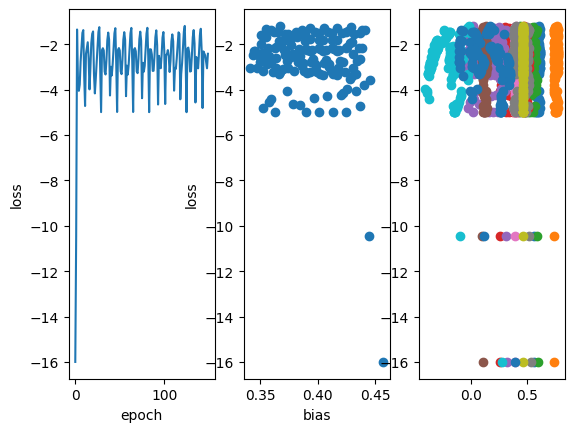

In [757]:
plt.subplot(1, 3, 1)
plt.plot(np.arange(len(model_clasificador.losses)), model_clasificador.losses)
plt.xlabel("epoch")
plt.ylabel("loss")

plt.subplot(1, 3, 2)
plt.scatter(model_clasificador.b_list, model_clasificador.losses)
plt.xlabel("bias")
plt.ylabel("loss")

#Separamos la lista en diferente arreglos. un total de 11 en este caso
tmp=np.array(model_clasificador.w_list)
subarrays=np.split(tmp,11,axis=1)


plt.subplot(1, 3, 3)
for i in range(0,11):
    plt.scatter(subarrays[i], model_clasificador.losses)


In [758]:
y_hat = model_clasificador.predict(X_test)

In [759]:
# Nota personal Investigar que es CSR matrix

In [760]:
#calculando que tan acertado fue el modelo

# por alguna razon no funciona la sentencia de numpy. Si tengo tiempo investigar despues
#numero_de_aciertos=np.count_nonzero((y_hat==y_test) == True)
counter=0
for i in range(0,len(y_hat)):
    if y_hat[i]==y_test[i]:
        counter=counter+1
numero_de_aciertos=counter

total_de_valores_a_predecir=len(y_test)

nivel_de_aciertos=numero_de_aciertos/total_de_valores_a_predecir

print(f"nivel_de_aciertos={nivel_de_aciertos:2f} = {numero_de_aciertos}/{total_de_valores_a_predecir}")

nivel_de_aciertos=0.770950 = 138/179


In [761]:

x_to_graph = np.arange(0, len(y_test), 1, dtype=int)
x_to_graph



array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178])

In [762]:
len(x_to_graph)

179

In [763]:
y_test_graph=y_test.reshape(1,len(y_test))
y_test_graph=y_test_graph[0]
y_test_graph

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1])

In [764]:
len(y_test_graph)

179

In [765]:
type(y_hat)
y_hat_to_graph = np.array(y_hat)
y_hat_to_graph

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1])

In [766]:
len(y_hat_to_graph)

179

In [767]:
from sklearn.metrics import log_loss
logloss = log_loss(y_test,y_hat)

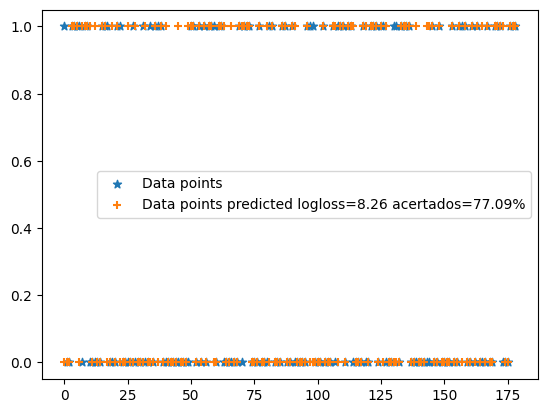

In [769]:
plt.scatter(x_to_graph, y_test_graph, label = "Data points",marker = '*')
plt.scatter(x_to_graph,y_hat_to_graph,label =  f"Data points predicted logloss={logloss:.2f} acertados={nivel_de_aciertos*100:.2f}%",marker="+")
#plt.plot(X, X_b.dot(theta), c = "r", label = "Model")
plt.legend()